Используя базу "Пассажиры автобуса", подготовьте данные для обучения нейронной сети, классифицирующей изображение на два класса:
- входящий пассажир
- выходящий пассажир

Добейтесь точности работы модели на проверочной выборке не ниже 85%

Ссылка на датасет: https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip

Информацию о загрузке изображений и преобразовании их в numnpy-массивы вы можете найти в Базе знаний:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.6563 - loss: 0.6369 - val_accuracy: 0.5521 - val_loss: 0.7573
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8118 - loss: 0.4209 - val_accuracy: 0.8421 - val_loss: 0.3521
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8352 - loss: 0.3514 - val_accuracy: 0.8355 - val_loss: 0.3484
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8660 - loss: 0.3094 - val_accuracy: 0.8443 - val_loss: 0.3424
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8754 - loss: 0.2814 - val_accuracy: 0.8568 - val_loss: 0.3626
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8951 - loss: 0.2512 - val_accuracy: 0.8164 - val_loss: 0.3696
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9072 - loss: 0.2301 - val_accuracy: 0.8928 - val_loss: 0.2541
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9121 - loss: 0.2126 - val_accuracy: 

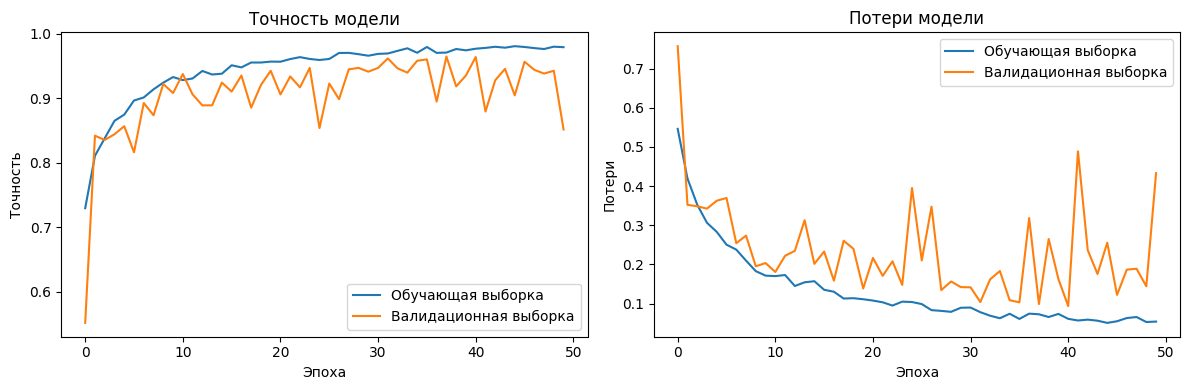

In [ ]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

if not os.path.exists("bus"):
    !unzip -q bus.zip -d bus

base_folder = Path("bus")

x_all, y_all = [], []

for folder in base_folder.iterdir():
    for filename in folder.iterdir():
        img = image.load_img(filename, target_size=(128, 128), color_mode="grayscale")
        y_all.append(0 if folder.name == "Входящий" else 1)
        img_array = np.array(img).astype("float32") / 255.0
        x_all.append(img_array.flatten())
x_all = np.array(x_all)
y_all = np.array(y_all)

x_train, x_temp, y_train, y_temp = train_test_split(
    x_all, y_all, test_size=0.3, random_state=42, stratify=y_all
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


drop_rate = 0.3
input_shape = 128 * 128

model = Sequential()

model.add(Dense(512, input_shape=(input_shape,)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

model.add(Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.0005),
    metrics=["accuracy"],
)


history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1,
)

_, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(
    f"Точность на обучающей выборке: {history.history['accuracy'][-1] * 100:.2f}%,\n"
    "Точность на валидационной выборке: "
    f"{history.history['val_accuracy'][-1] * 100:.2f}%,\n"
    f"Точность на тестовой выборке: {test_accuracy * 100:.2f}%"
)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Обучающая выборка")
plt.plot(history.history["val_accuracy"], label="Валидационная выборка")
plt.title("Точность модели")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Обучающая выборка")
plt.plot(history.history["val_loss"], label="Валидационная выборка")
plt.title("Потери модели")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend()

plt.tight_layout()
plt.show()
